In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("abalone.csv")

In [3]:
dataframe.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
y = dataframe["sex"].copy()

In [5]:
y

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: sex, Length: 4177, dtype: object

In [7]:
import numpy as np 
y = np.array(y)
y

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

In [9]:
y_ = []
for a in y:
    if a == "M":
        y_.append(1)
    elif a== "F":
        y_.append(2)
    elif a == "I":
        y_.append(3)

y__ = np.array(y_)
y__

array([1, 1, 2, ..., 1, 2, 1])

In [10]:
x = dataframe.drop("sex", axis=1)
x.shape, len(y_), dataframe.shape

((4177, 8), 4177, (4177, 9))

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train,x_test,  y_train,y_test = train_test_split(x, y__, test_size=0.23, shuffle=True, random_state=32)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3216, 8), (961, 8), (3216,), (961,))

In [23]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC

models = []
i = 1
lgr = "lrg"
so = lgr + str(i)
for solve in ['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']:
    so = LogisticRegression(C=10, random_state=32, solver=solve)
    models.append(so)

ric = RidgeClassifier(alpha=0.001, random_state=32)
svc = SVC()
models.append(ric)
models.append(svc)
models

[LogisticRegression(C=10, random_state=32, solver='newton-cg'),
 LogisticRegression(C=10, random_state=32),
 LogisticRegression(C=10, random_state=32, solver='liblinear'),
 LogisticRegression(C=10, random_state=32, solver='sag'),
 LogisticRegression(C=10, random_state=32, solver='saga'),
 RidgeClassifier(alpha=0.001, random_state=32),
 SVC()]

In [24]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score 

In [57]:
models_ = ["LogisticRegression-newton-cg", 'LogisticRegression',"LogisticRegression-liblinear","LogisticRegression-sag","LogisticRegression-saga", "RidgeClassifier", 'Suport Vector Classifier']
i = 0
precision = []
recalls = []
f1_sc = []
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #plot_confusion_matrix(model, x_test, y_test, labels=models_[i], display_labels=["Male", "Female","Infant" ])
    #precision_recall_curve(y_test, y_pred, pos_label=models_[i])
    pres = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1s = f1_score(y_test, y_pred, average=None)
    precision.append(pres.mean())
    recalls.append(recall.mean())
    f1_sc.append(f1s.mean())
    print("{}, Precision {}, Recall {}, F1_Score {}".format(model,pres.mean(), recall.mean(), f1s.mean()))

LogisticRegression(C=10, random_state=32, solver='newton-cg'), Precision 0.5655946065428824, Recall 0.5799909363164902, F1_Score 0.5635059818917746
LogisticRegression(C=10, random_state=32), Precision 0.570044491277368, Recall 0.5834361920610253, F1_Score 0.5700180046954241
LogisticRegression(C=10, random_state=32, solver='liblinear'), Precision 0.5547574197737941, Recall 0.5717241316644106, F1_Score 0.5535196716891725
LogisticRegression(C=10, random_state=32, solver='sag'), Precision 0.5453140321521425, Recall 0.5539779927346457, F1_Score 0.5381493506493507


C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_it

LogisticRegression(C=10, random_state=32, solver='saga'), Precision 0.5414557950080693, Recall 0.5468218003854685, F1_Score 0.5241425785223681
RidgeClassifier(alpha=0.001, random_state=32), Precision 0.5432057804320578, Recall 0.5616764752880372, F1_Score 0.5410678071932785
SVC(), Precision 0.5851827760881648, Recall 0.533320374689009, F1_Score 0.4536292375038176


In [58]:
models_ = ["LgR-newton-cg", 'LgR',"LgR-liblinear","LgR-sag","LgR-saga", "RiC", 'SVC']


No handles with labels found to put in legend.


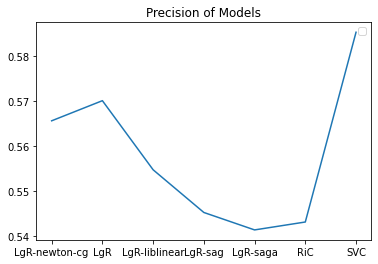

No handles with labels found to put in legend.


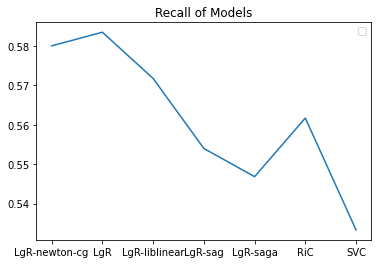

No handles with labels found to put in legend.


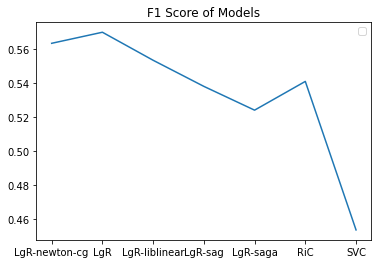

In [59]:
import matplotlib.pyplot as plt

plt.plot(models_, precision)
plt.title("Precision of Models")
plt.legend()
plt.show()

plt.plot(models_, recalls)
plt.title("Recall of Models")
plt.legend()
plt.show()

plt.plot(models_, f1_sc)
plt.title("F1 Score of Models")
plt.legend()
plt.show()


In [60]:
from joblib import dump
dump(svc, 'Abalone model classification.joblib')

['Abalone model classification.joblib']

In [62]:
from joblib import load
mode = load('Abalone model classification.joblib')
mode.predict(x_train[500:502]), y_train[500:502]

(array([1, 3]), array([1, 3]))